In [3]:
# Importa la biblioteca pandas con el alias pd, que se usa para manipulación de datos en estructuras tipo DataFrame.
import pandas as pd

# Importa la biblioteca numpy con el alias np, que se usa para operaciones numéricas avanzadas (aunque en este fragmento no se utiliza).
import numpy as np

# Lee el archivo 'grd_2023.csv' usando como delimitador el símbolo '|' y lo guarda en un DataFrame llamado grd.
grd = pd.read_csv('grd_2023.csv', delimiter='|')

# Muestra las primeras 5 filas del DataFrame grd para una vista preliminar de los datos.
grd.head()

# Lee el archivo 'hospitales.csv', sin encabezado (header=None), y con '|' como delimitador. Guarda el resultado en un DataFrame llamado hospitales.
hospitales = pd.read_csv('hospitales.csv', header=None, delimiter="|")

# Muestra las primeras 5 filas del DataFrame hospitales.
hospitales.head()

# Lee el archivo 'ir-GRD.csv', sin encabezado (header=None), usando '|' como delimitador, y lo guarda en el DataFrame ir.
ir = pd.read_csv('ir-GRD.csv', delimiter='|', header = None)

# Muestra el contenido completo del DataFrame ir.
ir


,0,1
0,11011,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES
1,11012,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES W/CC
2,11013,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES W...
3,11101,PH CRANEOTOMÍA
4,11102,PH CRANEOTOMÍA W/CC
...,...,...
1061,990089,"INAGRUPABLE, DURACIÓN DE LA ESTANCIA NO VÁLIDA"
1062,990099,"INAGRUPABLE, PACIENTE AMBULATORIO CON PROCED...."
1063,990119,"INAGRUPABLE, SIN CRITERIO DE AGRUPACIÓN PARA ..."
1064,990129,"INAGRUPABLE, SIN CRITERIO DE AGRUPACIÓN PARA ..."


In [4]:
grd.columns

Index(['COD_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO', 'FECHA_NACIMIENTO',
       'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO', 'FECHAALTA',
       'TIPOALTA', 'DIAGNOSTICO1', 'IR_29301_COD_GRD', 'IR_29301_PESO',
       'IR_29301_SEVERIDAD', 'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA'],
      dtype='object')

In [5]:
# Realiza una combinación (merge) entre los DataFrames grd y hospitales. 
# Se usa 'COD_HOSPITAL' de grd y la columna 0 de hospitales para hacer la combinación (join).
# Se utiliza 'how="left"' para hacer una combinación a la izquierda, lo que significa que todos los registros de grd estarán en el resultado.
grd_h = pd.merge(grd, hospitales, left_on='COD_HOSPITAL', right_on=0, how='left')

# Elimina la columna 0 del DataFrame resultante, que es la que se utilizó para la combinación y que ya no es necesaria.
grd_h = grd_h.drop(columns=0)

# Renombra la columna 1 del DataFrame resultante a 'NOMBRE_HOSPITAL' para que tenga un nombre más descriptivo.
grd_h = grd_h.rename(columns={1: 'NOMBRE_HOSPITAL'})

# Renombra la columna 'FECHAALTA' a 'FECHA_ALTA' para estandarizar el nombre de la columna.
grd_h = grd_h.rename(columns={"FECHAALTA": 'FECHA_ALTA'})

# Renombra la columna 'TIPOALTA' a 'TIPO_ALTA' para estandarizar el nombre de la columna.
grd_h = grd_h.rename(columns={"TIPOALTA": 'TIPO_ALTA'})

# Muestra las primeras 5 filas del DataFrame grd_h para revisar el resultado de las transformaciones.
grd_h.columns

Index(['COD_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO', 'FECHA_NACIMIENTO',
       'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO', 'FECHA_ALTA',
       'TIPO_ALTA', 'DIAGNOSTICO1', 'IR_29301_COD_GRD', 'IR_29301_PESO',
       'IR_29301_SEVERIDAD', 'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA',
       'NOMBRE_HOSPITAL'],
      dtype='object')

In [6]:
# Realiza una combinación (merge) entre los DataFrames grd_h y ir. 
# Se utiliza 'IR_29301_COD_GRD' de grd_h y la columna 0 de ir para hacer la combinación (join).
# Se utiliza 'how="left"' para hacer una combinación a la izquierda, asegurando que todos los registros de grd_h estén en el resultado.
# Después, se elimina la columna 0 de ir (que se utilizó para la combinación) y se renombra la columna 1 de ir a 'NOMBRE_IR'.
grd_f = pd.merge(grd_h, ir, left_on='IR_29301_COD_GRD', right_on=0, how='left').drop(columns=0).rename(columns={1: 'NOMBRE_IR'})

# Selecciona un subconjunto de columnas del DataFrame grd_f, asegurando que solo se mantendrán las columnas especificadas en la lista.
# Esto reordena las columnas y se asegura de que solo estén las necesarias para el análisis.
grd_f = grd_f[["COD_HOSPITAL", "NOMBRE_HOSPITAL", "CIP_ENCRIPTADO", "SEXO", "FECHA_NACIMIENTO",
               "SERVICIO_SALUD", "TIPO_INGRESO", "FECHA_INGRESO", "FECHA_ALTA", "TIPO_ALTA",
               "DIAGNOSTICO1", "NOMBRE_IR", "IR_29301_COD_GRD", "IR_29301_PESO", "IR_29301_SEVERIDAD",
               "IR_29301_MORTALIDAD", "EDAD","DIAS_ESTANCIA"]]

# Muestra el DataFrame resultante grd_f, que ahora contiene solo las columnas seleccionadas.
grd_f.columns

Index(['COD_HOSPITAL', 'NOMBRE_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO',
       'FECHA_NACIMIENTO', 'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO',
       'FECHA_ALTA', 'TIPO_ALTA', 'DIAGNOSTICO1', 'NOMBRE_IR',
       'IR_29301_COD_GRD', 'IR_29301_PESO', 'IR_29301_SEVERIDAD',
       'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA'],
      dtype='object')

In [7]:
#Vemos quienes murieron y creamos una columna binaria "Fallecido"
falle = grd_f["TIPO_ALTA"] == "FALLECIDO"
grd_f["FALLECIDO"] = falle.astype(int)
grd_f.head(5)

,COD_HOSPITAL,NOMBRE_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHA_ALTA,TIPO_ALTA,DIAGNOSTICO1,NOMBRE_IR,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,FALLECIDO
0,122100,Hospital Clínico Regional (Valdivia),72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,MH INFECCIONES GASTROINTESTINALES MAYORES,64161.0,0.7094,1.0,1.0,43.0,2,0
1,114101,Complejo Hospitalario Dr. Sótero del Río (San...,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,PH PROCEDIMIENTOS MODERADAMENTE COMPLEJOS SOB...,41301.0,1.0869,1.0,1.0,22.0,6,0
2,114101,Complejo Hospitalario Dr. Sótero del Río (San...,97627974.0,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,MH NEUMONÍA SIMPLE Y TOS FERINA,44161.0,0.4084,1.0,1.0,3.0,1,0
3,106103,Hospital Claudio Vicuña (San Antonio),67770674.0,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,PH HISTERECTOMIA VAGINAL Y OTROS PROCEDIMIENT...,131301.0,0.6406,1.0,1.0,45.0,1,0
4,106103,Hospital Claudio Vicuña (San Antonio),100390800.0,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,"MH ENFERMEDADES HEPÁTICAS EXCEPTO NEOPLASIAS,...",74131.0,0.5346,1.0,1.0,0.0,2,0


In [8]:
# Se definen los rangos etarios (utilizando un valor menor a 0 para que se consideren valores = 0)
bins = [-0.1, 5, 11, 17, 26, 59, float('inf')]
labels = ['Primera infancia', 'Infancia', 'Adolescencia', 'Juventud', 'Adultez', 'Persona mayor']

# Crear una nueva columna con los rangos etarios
grd_f['AGE_GROUP'] = pd.cut(grd_f['EDAD'], bins=bins, labels=labels, right=True)

print(grd_f[['EDAD', 'AGE_GROUP']])

         EDAD         AGE_GROUP
0        43.0           Adultez
1        22.0          Juventud
2         3.0  Primera infancia
3        45.0           Adultez
4         0.0  Primera infancia
...       ...               ...
1039582  27.0           Adultez
1039583  32.0           Adultez
1039584   9.0          Infancia
1039585   9.0          Infancia
1039586  72.0     Persona mayor

[1039587 rows x 2 columns]


In [9]:
grd_f.columns

Index(['COD_HOSPITAL', 'NOMBRE_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO',
       'FECHA_NACIMIENTO', 'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO',
       'FECHA_ALTA', 'TIPO_ALTA', 'DIAGNOSTICO1', 'NOMBRE_IR',
       'IR_29301_COD_GRD', 'IR_29301_PESO', 'IR_29301_SEVERIDAD',
       'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA', 'FALLECIDO',
       'AGE_GROUP'],
      dtype='object')

In [10]:
grd_f.dtypes

COD_HOSPITAL              int64
NOMBRE_HOSPITAL          object
CIP_ENCRIPTADO          float64
SEXO                     object
FECHA_NACIMIENTO         object
SERVICIO_SALUD           object
TIPO_INGRESO             object
FECHA_INGRESO            object
FECHA_ALTA               object
TIPO_ALTA                object
DIAGNOSTICO1             object
NOMBRE_IR                object
IR_29301_COD_GRD        float64
IR_29301_PESO           float64
IR_29301_SEVERIDAD      float64
IR_29301_MORTALIDAD     float64
EDAD                    float64
DIAS_ESTANCIA             int64
FALLECIDO                 int32
AGE_GROUP              category
dtype: object

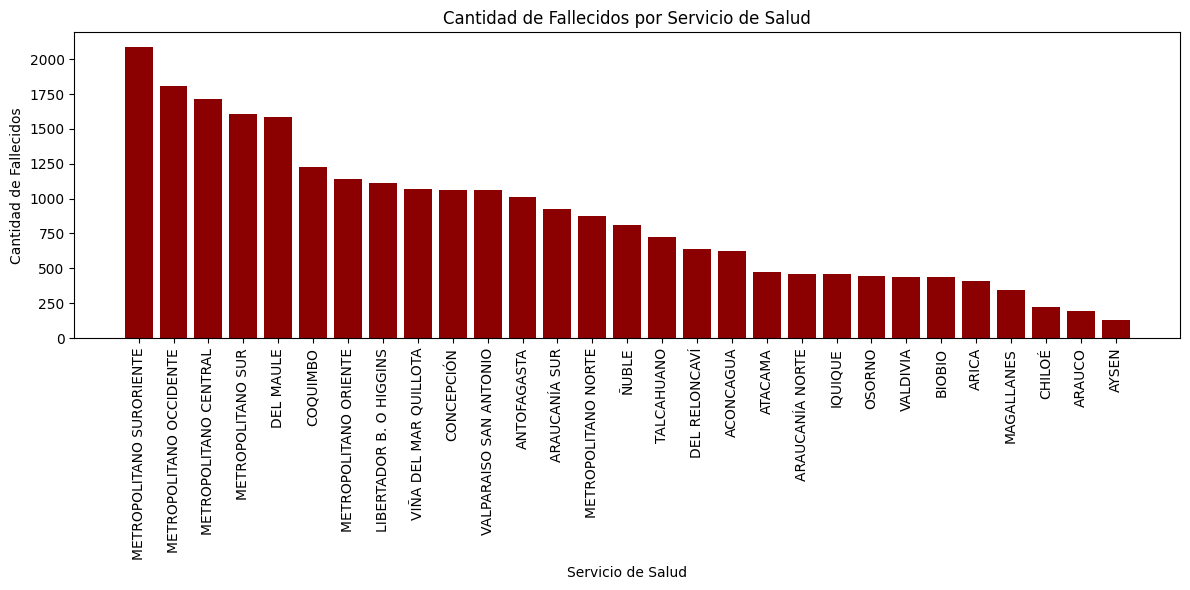

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar y contar fallecidos por SERVICIO_SALUD
fallecidos_por_servicio = grd_f.groupby('SERVICIO_SALUD')['FALLECIDO'].sum().sort_values(ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(fallecidos_por_servicio.index, fallecidos_por_servicio.values, color='darkred')

# Añadir etiquetas y título
plt.title('Cantidad de Fallecidos por Servicio de Salud')
plt.xlabel('Servicio de Salud')
plt.ylabel('Cantidad de Fallecidos')
plt.xticks(rotation=90)

# Mostrar gráfico
plt.tight_layout()
plt.show()


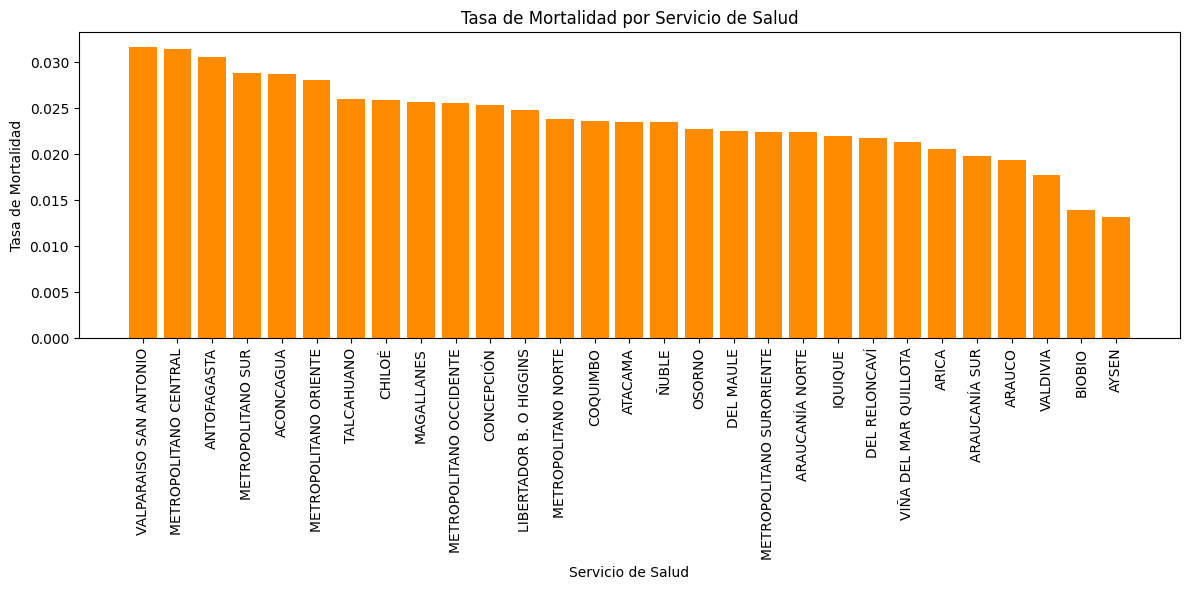

In [12]:
# Agrupar por SERVICIO_SALUD: sumar fallecidos y contar total de pacientes
grupo_servicio = grd_f.groupby('SERVICIO_SALUD').agg(
    fallecidos=('FALLECIDO', 'sum'),
    total=('FALLECIDO', 'count')
)

# Calcular tasa de mortalidad y ordenar de mayor a menor
grupo_servicio['tasa_mortalidad'] = grupo_servicio['fallecidos'] / grupo_servicio['total']
grupo_servicio_sorted = grupo_servicio.sort_values(by='tasa_mortalidad', ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(grupo_servicio_sorted.index, grupo_servicio_sorted['tasa_mortalidad'], color='darkorange')

# Etiquetas y título
plt.title('Tasa de Mortalidad por Servicio de Salud')
plt.xlabel('Servicio de Salud')
plt.ylabel('Tasa de Mortalidad')
plt.xticks(rotation=90)

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [13]:
grd_f = grd_f.dropna()

In [14]:
def proc(i):
    u = (i.strip().split())[0]
    return u

In [15]:
grd_f["AH"] = grd_f["NOMBRE_IR"].apply(lambda x: proc(x))

In [16]:
grd_f.drop(["COD_HOSPITAL","NOMBRE_HOSPITAL","CIP_ENCRIPTADO", "SERVICIO_SALUD" ,"FECHA_NACIMIENTO",
        "FECHA_INGRESO","FECHA_ALTA", 'IR_29301_SEVERIDAD','IR_29301_MORTALIDAD'
        ,'IR_29301_COD_GRD', 'IR_29301_PESO',"TIPO_ALTA", "NOMBRE_IR", "DIAGNOSTICO1",], axis=1, inplace= True)

In [17]:
grd_f

,SEXO,TIPO_INGRESO,EDAD,DIAS_ESTANCIA,FALLECIDO,AGE_GROUP,AH
0,HOMBRE,URGENCIA,43.0,2,0,Adultez,MH
2,HOMBRE,URGENCIA,3.0,1,0,Primera infancia,MH
3,MUJER,PROGRAMADA,45.0,1,0,Adultez,PH
4,MUJER,URGENCIA,0.0,2,0,Primera infancia,MH
5,MUJER,PROGRAMADA,58.0,0,0,Adultez,PA
...,...,...,...,...,...,...,...
1039582,MUJER,OBSTETRICA,27.0,3,0,Adultez,PH
1039583,MUJER,PROGRAMADA,32.0,0,0,Adultez,PA
1039584,HOMBRE,URGENCIA,9.0,2,0,Infancia,PH
1039585,HOMBRE,PROGRAMADA,9.0,0,0,Infancia,MH


In [18]:
grd_f["DIAS_ESTANCIA"].max()

696

In [19]:
grd_f.head()

,SEXO,TIPO_INGRESO,EDAD,DIAS_ESTANCIA,FALLECIDO,AGE_GROUP,AH
0,HOMBRE,URGENCIA,43.0,2,0,Adultez,MH
2,HOMBRE,URGENCIA,3.0,1,0,Primera infancia,MH
3,MUJER,PROGRAMADA,45.0,1,0,Adultez,PH
4,MUJER,URGENCIA,0.0,2,0,Primera infancia,MH
5,MUJER,PROGRAMADA,58.0,0,0,Adultez,PA


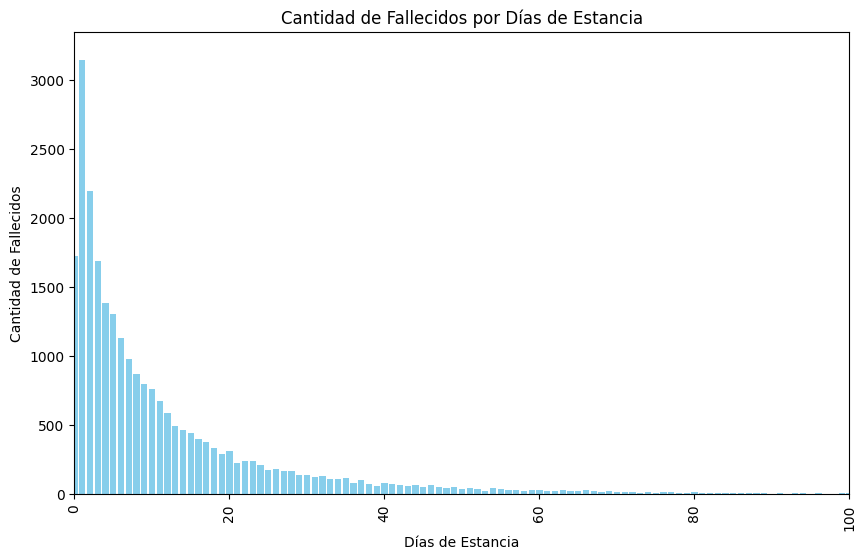

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar los datos por DIAS_ESTANCIA y contar la cantidad de fallecidos para cada grupo
fallecidos_por_dia = grd_f.groupby('DIAS_ESTANCIA')['FALLECIDO'].sum().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(fallecidos_por_dia['DIAS_ESTANCIA'], fallecidos_por_dia['FALLECIDO'], color='skyblue')

# Añadir etiquetas y título
plt.title('Cantidad de Fallecidos por Días de Estancia')
plt.xlabel('Días de Estancia')
plt.ylabel('Cantidad de Fallecidos')

# Ajustar los límites del gráfico en el eje X (hasta el máximo de días de estancia) y en el eje Y (hasta el máximo de fallecidos)
plt.xlim(0, 100)  # Limitar el eje X al máximo de días de estancia
plt.ylim(0, fallecidos_por_dia['FALLECIDO'].max()+200)  # Limitar el eje Y al máximo de fallecidos

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si es necesario
plt.show()




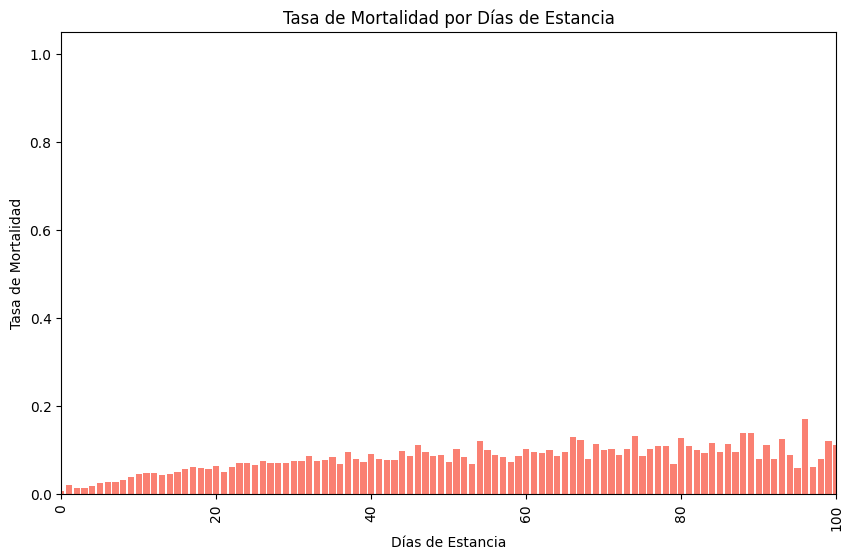

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar los datos por DIAS_ESTANCIA
grupo_dias = grd_f.groupby('DIAS_ESTANCIA').agg(
    fallecidos=('FALLECIDO', 'sum'),  # Sumar los fallecidos (1 = fallecido)
    total_pacientes=('FALLECIDO', 'count')  # Contar el total de pacientes
).reset_index()

# Calcular la tasa de mortalidad
grupo_dias['tasa_mortalidad'] = grupo_dias['fallecidos'] / grupo_dias['total_pacientes']

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(grupo_dias['DIAS_ESTANCIA'], grupo_dias['tasa_mortalidad'], color='salmon')

# Añadir etiquetas y título
plt.title('Tasa de Mortalidad por Días de Estancia')
plt.xlabel('Días de Estancia')
plt.ylabel('Tasa de Mortalidad')

# Ajustar los límites del gráfico en el eje X (hasta el máximo de días de estancia) y en el eje Y (hasta el máximo de tasa de mortalidad)
plt.xlim(0, 100)  # Limitar el eje X al máximo de días de estancia
plt.ylim(0, grupo_dias['tasa_mortalidad'].max() + 0.05)  # Limitar el eje Y hasta el máximo de la tasa de mortalidad

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si es necesario
plt.show()


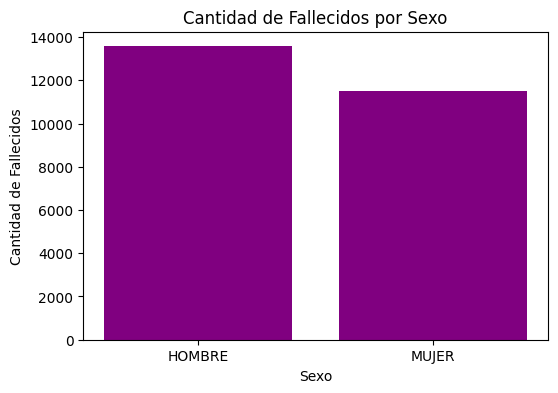

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por SEXO y sumar los fallecidos
fallecidos_por_sexo = grd_f.groupby('SEXO')['FALLECIDO'].sum().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(fallecidos_por_sexo['SEXO'], fallecidos_por_sexo['FALLECIDO'], color='purple')

# Añadir etiquetas y título
plt.title('Cantidad de Fallecidos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Fallecidos')

# Mostrar el gráfico
plt.show()


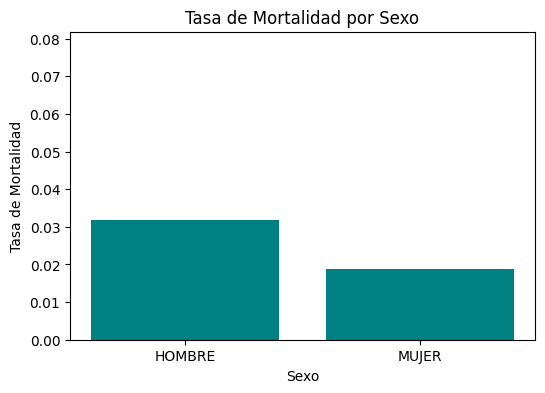

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por SEXO: sumar fallecidos y contar total de pacientes
grupo_sexo = grd_f.groupby('SEXO').agg(
    fallecidos=('FALLECIDO', 'sum'),
    total=('FALLECIDO', 'count')
).reset_index()

# Calcular la tasa de mortalidad
grupo_sexo['tasa_mortalidad'] = grupo_sexo['fallecidos'] / grupo_sexo['total']

# Crear gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(grupo_sexo['SEXO'], grupo_sexo['tasa_mortalidad'], color='teal')

# Etiquetas y título
plt.title('Tasa de Mortalidad por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Tasa de Mortalidad')

# Mostrar gráfico
plt.ylim(0, grupo_sexo['tasa_mortalidad'].max() + 0.05)
plt.show()


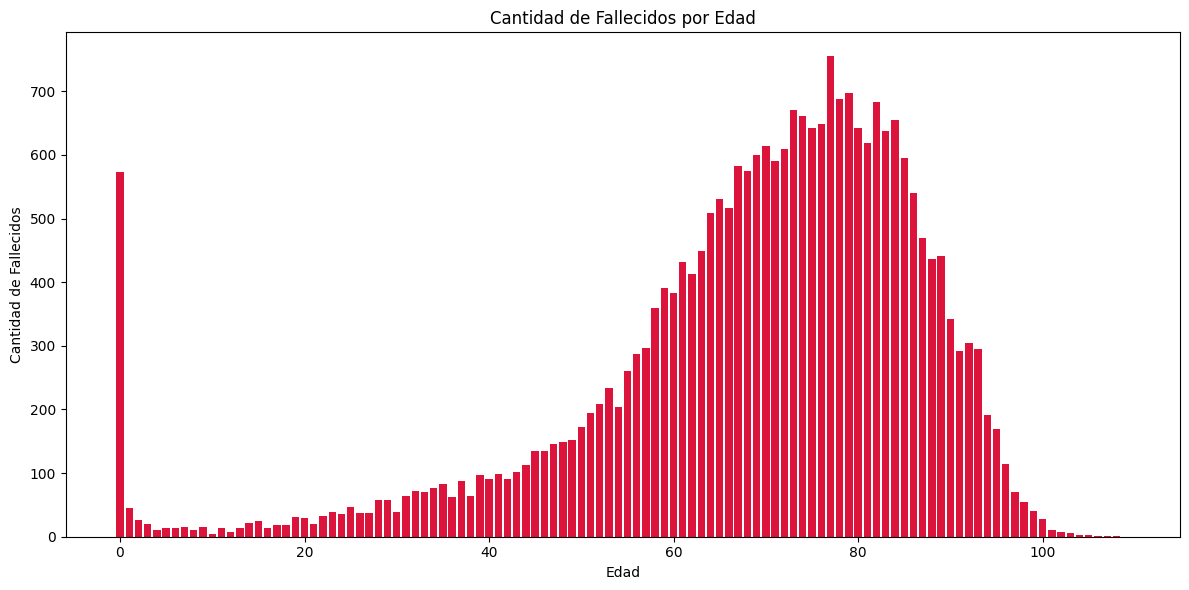

In [24]:
import matplotlib.pyplot as plt

# Agrupar por edad: contar fallecidos (1 = fallecido, 0 = no)
fallecidos_por_edad = grd_f.groupby('EDAD')['FALLECIDO'].sum()

# Crear gráfico
plt.figure(figsize=(12, 6))
plt.bar(fallecidos_por_edad.index, fallecidos_por_edad.values, color='crimson')

# Etiquetas
plt.title('Cantidad de Fallecidos por Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Fallecidos')

# Mostrar gráfico
plt.tight_layout()
plt.show()


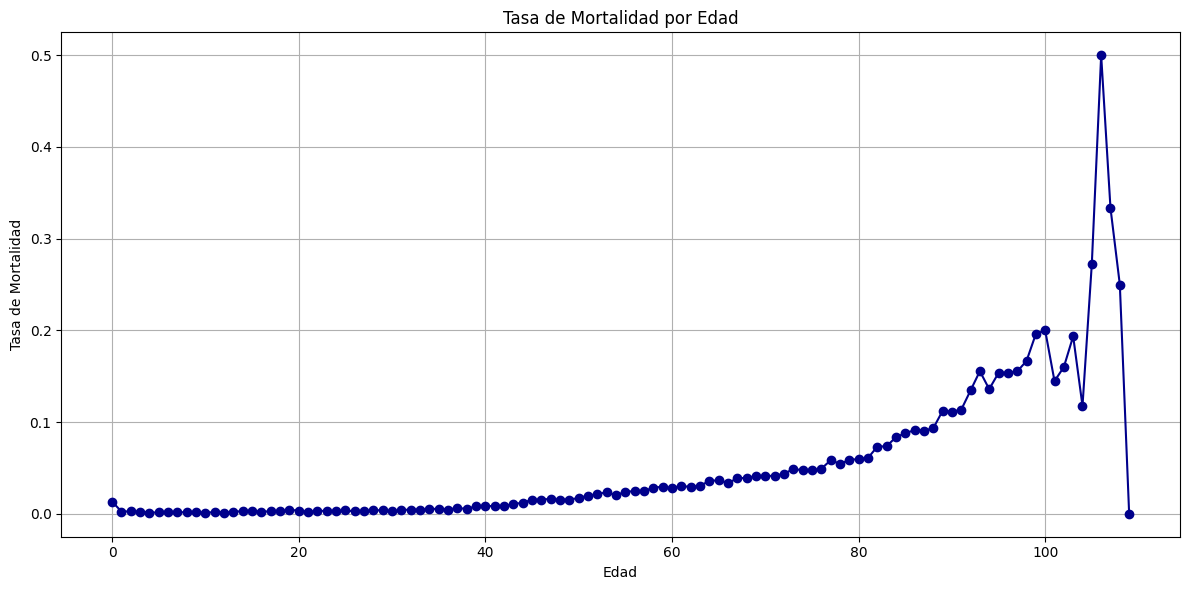

In [25]:
import matplotlib.pyplot as plt

# Agrupar por edad: sumar fallecidos y contar total de pacientes
grupo_edad = grd_f.groupby('EDAD').agg(
    fallecidos=('FALLECIDO', 'sum'),
    total=('FALLECIDO', 'count')
)

# Calcular tasa de mortalidad
grupo_edad['tasa_mortalidad'] = grupo_edad['fallecidos'] / grupo_edad['total']

# Crear gráfico
plt.figure(figsize=(12, 6))
plt.plot(grupo_edad.index, grupo_edad['tasa_mortalidad'], marker='o', linestyle='-', color='darkblue')

# Etiquetas
plt.title('Tasa de Mortalidad por Edad')
plt.xlabel('Edad')
plt.ylabel('Tasa de Mortalidad')
plt.grid(True)

# Mostrar gráfico
plt.tight_layout()
plt.show()


C:\Users\fhere\AppData\Local\Temp\ipykernel_7776\3529823745.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fallecidos_por_grupo = grd_f.groupby('AGE_GROUP')['FALLECIDO'].sum()


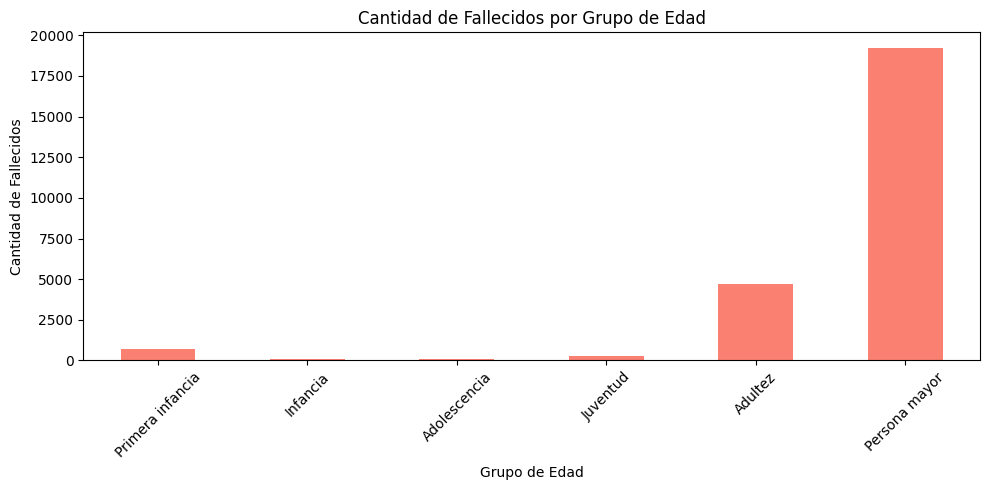

In [26]:
# Agrupar por grupo de edad y contar fallecidos
fallecidos_por_grupo = grd_f.groupby('AGE_GROUP')['FALLECIDO'].sum()

# Graficar
plt.figure(figsize=(10, 5))
fallecidos_por_grupo.plot(kind='bar', color='salmon')

plt.title('Cantidad de Fallecidos por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Fallecidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\fhere\AppData\Local\Temp\ipykernel_7776\1763451484.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = grd_f.groupby('AGE_GROUP').agg(


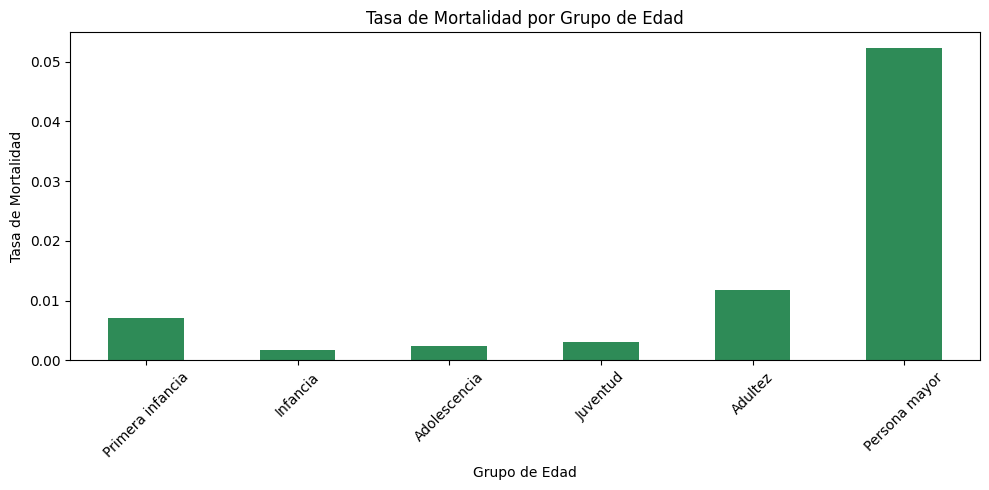

In [27]:
# Agrupar por grupo de edad y calcular fallecidos y total de pacientes
grupo = grd_f.groupby('AGE_GROUP').agg(
    fallecidos=('FALLECIDO', 'sum'),
    total=('FALLECIDO', 'count')
)

# Calcular la tasa
grupo['tasa_mortalidad'] = grupo['fallecidos'] / grupo['total']

# Graficar
plt.figure(figsize=(10, 5))
grupo['tasa_mortalidad'].plot(kind='bar', color='seagreen')

plt.title('Tasa de Mortalidad por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Mortalidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


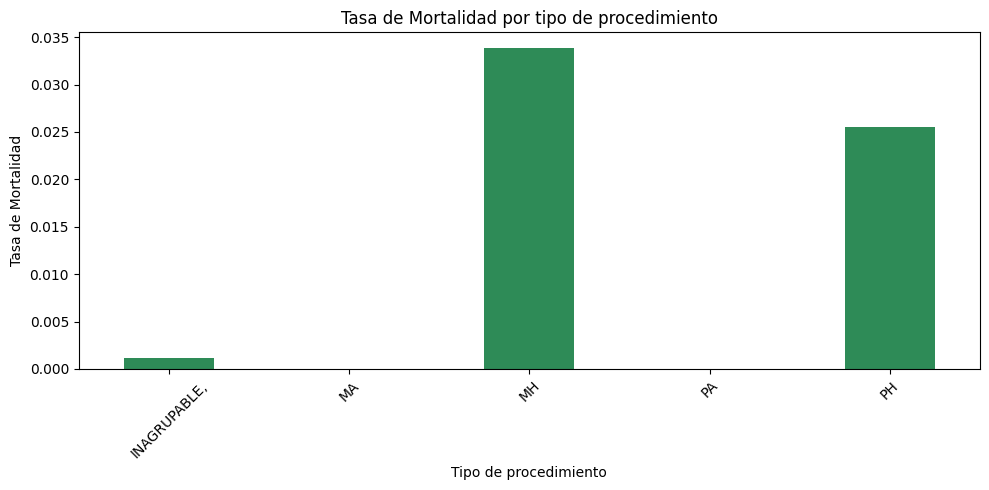

In [28]:
#Muertes por tipo de procedimiento
grupo = grd_f.groupby('AH').agg(
    fallecidos=('FALLECIDO', 'sum'),
    total=('FALLECIDO', 'count')
)

# Calcular la tasa
grupo['tasa_mortalidad'] = grupo['fallecidos'] / grupo['total']

# Graficar
plt.figure(figsize=(10, 5))
grupo['tasa_mortalidad'].plot(kind='bar', color='seagreen')

plt.title('Tasa de Mortalidad por tipo de procedimiento')
plt.xlabel('Tipo de procedimiento')
plt.ylabel('Tasa de Mortalidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Borramos las columnas que no tengan incidencia aparente sobre la muerte del paciente

Ahora aplicamos un Kmean para determinar un grupo con alta tasa de mortalidad, de tal manera reducir el alcance, y trabajar con un grupo con datos de muerte más balanceados.

In [29]:
grd_f.columns

Index(['SEXO', 'TIPO_INGRESO', 'EDAD', 'DIAS_ESTANCIA', 'FALLECIDO',
       'AGE_GROUP', 'AH'],
      dtype='object')

In [30]:
#Ya que tomamos en cuenta la edad, no es necesario considerar el Age Group
grd_f.drop("AGE_GROUP", axis = 1, inplace = True)

In [31]:
grd_dummies = pd.get_dummies(grd_f)

In [32]:
grd_dummies

,EDAD,DIAS_ESTANCIA,FALLECIDO,SEXO_HOMBRE,SEXO_MUJER,TIPO_INGRESO_OBSTETRICA,TIPO_INGRESO_PROGRAMADA,TIPO_INGRESO_URGENCIA,"AH_INAGRUPABLE,",AH_MA,AH_MH,AH_PA,AH_PH
0,43.0,2,0,True,False,False,False,True,False,False,True,False,False
2,3.0,1,0,True,False,False,False,True,False,False,True,False,False
3,45.0,1,0,False,True,False,True,False,False,False,False,False,True
4,0.0,2,0,False,True,False,False,True,False,False,True,False,False
5,58.0,0,0,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039582,27.0,3,0,False,True,True,False,False,False,False,False,False,True
1039583,32.0,0,0,False,True,False,True,False,False,False,False,True,False
1039584,9.0,2,0,True,False,False,False,True,False,False,False,False,True
1039585,9.0,0,0,True,False,False,True,False,False,False,True,False,False


Para calcular el numero ópitmo de clusters, usamos el método del codo. Para esto, hay que cambiar los booleanos 

In [33]:
grd_dummies.dtypes

EDAD                       float64
DIAS_ESTANCIA                int64
FALLECIDO                    int32
SEXO_HOMBRE                   bool
SEXO_MUJER                    bool
TIPO_INGRESO_OBSTETRICA       bool
TIPO_INGRESO_PROGRAMADA       bool
TIPO_INGRESO_URGENCIA         bool
AH_INAGRUPABLE,               bool
AH_MA                         bool
AH_MH                         bool
AH_PA                         bool
AH_PH                         bool
dtype: object

In [34]:
grd_dummies.columns

Index(['EDAD', 'DIAS_ESTANCIA', 'FALLECIDO', 'SEXO_HOMBRE', 'SEXO_MUJER',
       'TIPO_INGRESO_OBSTETRICA', 'TIPO_INGRESO_PROGRAMADA',
       'TIPO_INGRESO_URGENCIA', 'AH_INAGRUPABLE,', 'AH_MA', 'AH_MH', 'AH_PA',
       'AH_PH'],
      dtype='object')

In [35]:
grd_dummies_stand = grd_dummies[['EDAD', 'DIAS_ESTANCIA', 'FALLECIDO', 'SEXO_HOMBRE', 'SEXO_MUJER',
       'TIPO_INGRESO_OBSTETRICA', 'TIPO_INGRESO_PROGRAMADA',
       'TIPO_INGRESO_URGENCIA', 'AH_INAGRUPABLE,', 'AH_MA', 'AH_MH', 'AH_PA',
       'AH_PH']].astype(float)

Para disminuir el alcance del trabajo, se pueden armar clusters, y elegir un grupo específico de personas sobre los cuales armar un modelo con datos balanceados.
Para esto, necesitamos saber un número óptimo de clusters. Calculamos este valor óptimo utilizando el método del codo.

In [36]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [37]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)

X = grd_dummies_stand
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

Distortion values:
1 : 815.4332674421553
2 : 320.7747081751497
3 : 255.08805869771825
4 : 170.02050685100573
5 : 132.48632534827868
6 : 108.47159465063548
7 : 93.81140488895225
8 : 80.50009398383652
9 : 71.05321389305487
10 : 63.076332193483175
11 : 57.41312944379143
12 : 52.726992469083584
13 : 48.762681146930625
14 : 45.6248658959548


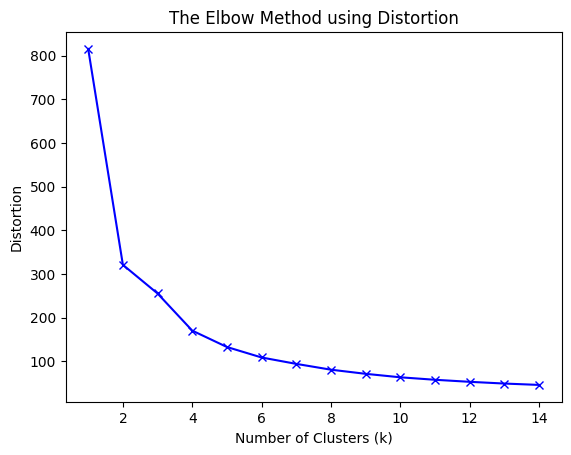

In [38]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Inertia values:
1 : 845668717.5656003
2 : 332668713.57959366
3 : 264546468.82618603
4 : 176324697.2244147
5 : 137398785.8058946
6 : 112493612.90870912
7 : 97289837.97085315
8 : 83484956.96864149
9 : 73687796.0109879
10 : 65415139.514884524
11 : 59541950.87046506
12 : 54682056.62286836
13 : 50570752.601186484
14 : 47316590.298496455


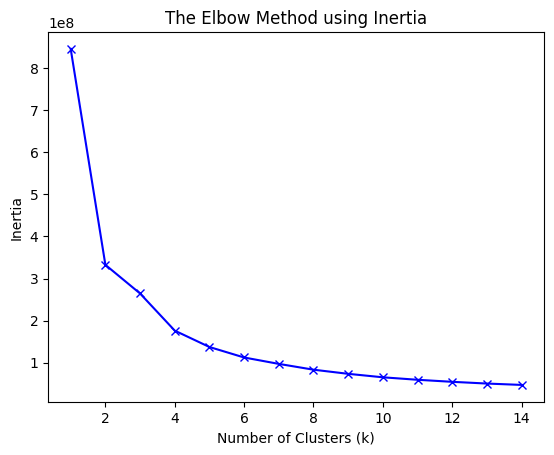

In [39]:
print("Inertia values:")
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Tras utilizar el método del codo, podemos ver que los la inercia después de 5 o 6 clusters disminuye de manera significativa. Por ende, trabajaremos con 6 clusters.

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Separar fallecidos y no fallecidos
df_f = grd_dummies_stand[grd_dummies_stand['FALLECIDO'] == 1]
df_nf = grd_dummies_stand[grd_dummies_stand['FALLECIDO'] == 0].sample(n=len(df_f), random_state=42)

# Unir ambos para un set balanceado
df_bal = pd.concat([df_f, df_nf])

# Repetir clustering con set balanceado
X = df_bal.drop(columns=['FALLECIDO'])
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=6, random_state=42)
df_bal['cluster'] = kmeans.fit_predict(X_scaled)

# Ver la proporción de fallecidos por cluster
cluster_fallecidos = df_bal.groupby("cluster")["FALLECIDO"].mean()
print(cluster_fallecidos)


cluster
0    0.606445
1    0.596367
2    0.374493
3    0.001283
4    0.650855
5    0.000000
Name: FALLECIDO, dtype: float64


Entonces, los clusters con una tasa de mortalidad sobre la cual se puede armar un modelo balanceado son los cluster 0, 2 y 5.

In [41]:
# Sacar la media de cada variable por clúster
cluster_summary = df_bal.groupby("cluster").mean(numeric_only=True)
print(cluster_summary)


              EDAD  DIAS_ESTANCIA  FALLECIDO  SEXO_HOMBRE  SEXO_MUJER  \
cluster                                                                 
0        59.243221       9.181818   0.606445     1.000000    0.000000   
1        62.129121       8.341654   0.596367     0.000000    1.000000   
2        48.835140       9.542994   0.374493     0.000083    0.999917   
3        51.573536       0.071184   0.001283     0.448268    0.551732   
4        56.947456      16.609049   0.650855     0.995309    0.004691   
5        63.470588       0.000000   0.000000     0.705882    0.294118   

         TIPO_INGRESO_OBSTETRICA  TIPO_INGRESO_PROGRAMADA  \
cluster                                                     
0                       0.000000                 0.061320   
1                       0.000000                 0.066626   
2                       0.324257                 0.169660   
3                       0.000000                 0.968576   
4                       0.000000                 

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analizar_cluster(df, cluster_n, variables_a_graficar=None):
    """
    Analiza un clúster específico en profundidad.
    
    Parámetros:
    - df: DataFrame con columnas 'cluster' y 'FALLECIDO' (ya debe estar balanceado y etiquetado).
    - cluster_n: número del clúster a analizar.
    - variables_a_graficar: lista de variables numéricas que deseas visualizar (opcional).
    """
    print(f"\n📌 Análisis del clúster {cluster_n}:\n" + "-"*40)
    
    df_cluster = df[df['cluster'] == cluster_n]
    df_otros = df[df['cluster'] != cluster_n]
    
    print(f"➡️ Número de observaciones en el clúster: {len(df_cluster)}")
    print(f"➡️ Porcentaje de fallecidos en el clúster: {df_cluster['FALLECIDO'].mean():.2%}")
    
    # Estadísticas generales
    print("\n📊 Estadísticas generales del clúster:\n")
    display(df_cluster.describe())

    # Comparación con el resto
    print("\n📈 Comparación de medias con el resto del dataset:\n")
    comparacion = pd.DataFrame({
        f'Cluster_{cluster_n}': df_cluster.mean(numeric_only=True),
        'Otros': df_otros.mean(numeric_only=True)
    })
    comparacion['Diferencia'] = comparacion[f'Cluster_{cluster_n}'] - comparacion['Otros']
    display(comparacion.sort_values(by='Diferencia', ascending=False))

    # Visualización de variables clave
    if variables_a_graficar:
        for var in variables_a_graficar:
            if var in df.columns:
                plt.figure(figsize=(10, 4))
                
                # Boxplot general por clúster
                plt.subplot(1, 2, 1)
                sns.boxplot(x='cluster', y=var, data=df)
                plt.title(f"{var} por clúster")

                # Histograma solo del clúster
                plt.subplot(1, 2, 2)
                df_cluster[var].hist(bins=20, color='orange')
                plt.title(f"Distribución de {var} en clúster {cluster_n}")
                plt.xlabel(var)
                plt.ylabel("Frecuencia")

                plt.tight_layout()
                plt.show()
            else:
                print(f"⚠️ Variable '{var}' no encontrada en el DataFrame.")



📌 Análisis del clúster 2:
----------------------------------------
➡️ Número de observaciones en el clúster: 12083
➡️ Porcentaje de fallecidos en el clúster: 37.45%

📊 Estadísticas generales del clúster:



,EDAD,DIAS_ESTANCIA,FALLECIDO,SEXO_HOMBRE,SEXO_MUJER,TIPO_INGRESO_OBSTETRICA,TIPO_INGRESO_PROGRAMADA,TIPO_INGRESO_URGENCIA,"AH_INAGRUPABLE,",AH_MA,AH_MH,AH_PA,AH_PH,cluster
count,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.0,12083.0,12083.000000,12083.0,12083.000000,12083.0
mean,48.835140,9.542994,0.374493,0.000083,0.999917,0.324257,0.169660,0.506083,0.0,0.0,0.064554,0.0,0.935446,2.0
std,22.594083,16.651303,0.484012,0.009097,0.009097,0.468116,0.375349,0.499984,0.0,0.0,0.245747,0.0,0.245747,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,2.0
25%,30.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,2.0
50%,46.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.0,1.000000,2.0
75%,69.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.0,0.0,0.000000,0.0,1.000000,2.0
max,103.000000,274.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,2.0



📈 Comparación de medias con el resto del dataset:



,Cluster_2,Otros,Diferencia
AH_PH,0.935446,0.251939,0.683508
SEXO_MUJER,0.999917,0.374583,0.625335
TIPO_INGRESO_OBSTETRICA,0.324257,0.000000,0.324257
cluster,2.000000,1.685306,0.314694
AH_MA,0.000000,0.000447,-0.000447
"AH_INAGRUPABLE,",0.000000,0.001236,-0.001236
TIPO_INGRESO_PROGRAMADA,0.169660,0.198570,-0.028910
AH_PA,0.000000,0.121802,-0.121802
DIAS_ESTANCIA,9.542994,9.673607,-0.130613
FALLECIDO,0.374493,0.539869,-0.165376


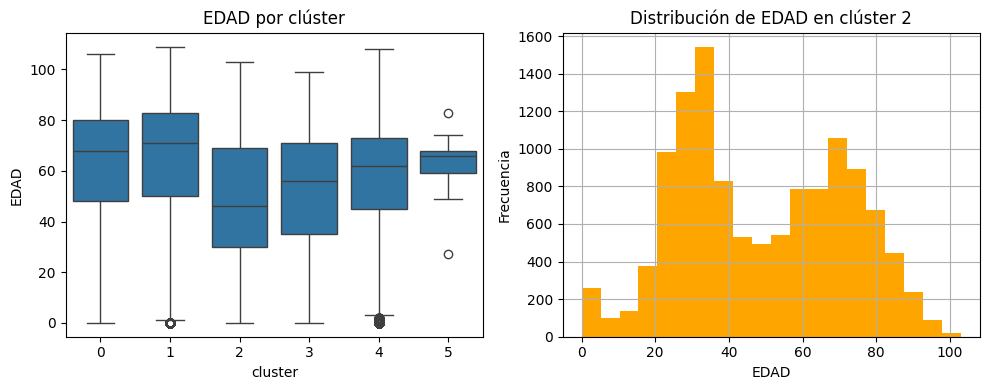

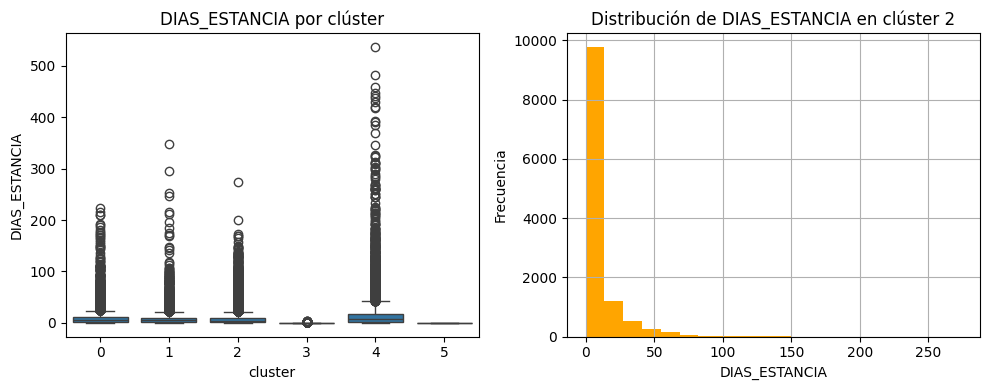

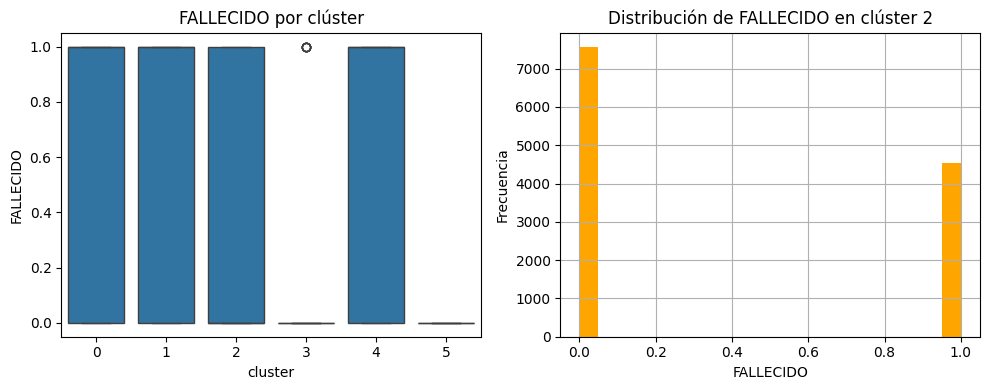

In [43]:
analizar_cluster(df_bal, cluster_n=2, variables_a_graficar=['EDAD', 'DIAS_ESTANCIA', "FALLECIDO"])


Buscar cual modelo es el mejor

In [44]:
import pandas as pd
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

In [45]:
def prediccion_modelos(data, target):
    X = data.drop(target, axis = 1)
    y= data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=recall_score)
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)
    return models


In [46]:
# Filtrar solo el clúster 2
df_cluster2 = df_bal[df_bal['cluster'] == 2].copy()

# Eliminar columna 'cluster' porque no es predictora aquí
df_cluster2 = df_cluster2.drop(columns=['cluster'])

# Usar la función de predicción
resultados_cluster4 = prediccion_modelos(df_cluster2, target='FALLECIDO')
print(resultados_cluster4)


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 2283, number of negative: 3758
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 212
[LightGBM] [Info] Number of data points in the train set: 6041, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377918 -> initscore=-0.498397
[LightGBM] [Info] Start training from score -0.498397
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelSpreading                     0.86               0.86     0.86      0.86   
LabelPropagation                   0.86               0.86     0.86      0.86   
SVC                                0.85               0.86     0.86      0.85   
LGBMClassifier                     0.85   

Probar regresion logistica

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

def Logistic_Regression_SKL(df,target):
    X = df.drop("target", axis = 1)
    y = df["target"]

    # Optional: encode categorical variables if needed
    # X = pd.get_dummies(X, drop_first=True)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predictions and evaluation
    y_pred = model.predict(X_test)

    return({"Accuracy": accuracy_score(y_test, y_pred),"Classification Report": classification_report(y_test, y_pred)})

In [48]:

df_cluster2 = df_cluster2.rename(columns={"FALLECIDO": "target"})


In [49]:
Logistic_Regression_SKL(df_cluster2,target='target')

{'Accuracy': 0.8514687629292511,
 'Classification Report': '              precision    recall  f1-score   support\n\n         0.0       0.92      0.84      0.87      1490\n         1.0       0.77      0.88      0.82       927\n\n    accuracy                           0.85      2417\n   macro avg       0.84      0.86      0.85      2417\nweighted avg       0.86      0.85      0.85      2417\n'}

In [50]:
X_train = df_cluster2.drop(columns=['target'])


In [51]:
# Preparar datos
X = df_cluster2.drop(columns=['target'])
y = df_cluster2['target']

# Separar train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo y guardarlo
modelo_logit = LogisticRegression(max_iter=1000)
modelo_logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [52]:
# Definir las columnas que usaste para entrenar el modelo
columnas_modelo = df_cluster2.drop(columns=['target']).columns

# 1. Filtrar el nuevo dataset
df_nuevo = grd_dummies[
    (grd_dummies['EDAD'] >= 40) & (grd_dummies['EDAD'] <= 60) &
    (grd_dummies['DIAS_ESTANCIA'] >= 5) & (grd_dummies['DIAS_ESTANCIA'] <= 15) &
    (grd_dummies['SEXO_MUJER'] == 1) &
    (grd_dummies['AH_PH'] == 1)
].copy()

# 2. Tomar solo las columnas necesarias
X_nuevo = df_nuevo[columnas_modelo]

# 3. Predecir con el modelo ya entrenado
df_nuevo['prediccion'] = modelo_logit.predict(X_nuevo)
df_nuevo['prob_fallecido'] = modelo_logit.predict_proba(X_nuevo)[:, 1]

# 4. Ver resultados
print(df_nuevo[['prediccion', 'prob_fallecido']].head())


     prediccion  prob_fallecido
356        1.00            0.53
529        1.00            0.56
561        1.00            0.56
684        1.00            0.69
750        0.00            0.12


In [53]:
from sklearn.metrics import classification_report

print(classification_report(df_nuevo['FALLECIDO'], df_nuevo['prediccion']))


              precision    recall  f1-score   support

           0       0.99      0.38      0.55     10877
           1       0.04      0.93      0.08       298

    accuracy                           0.40     11175
   macro avg       0.52      0.66      0.31     11175
weighted avg       0.97      0.40      0.54     11175



In [54]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(df_nuevo['FALLECIDO'], df_nuevo['prob_fallecido'])
print(f"AUC ROC: {auc:.3f}")


AUC ROC: 0.707


In [55]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

umbrales = np.arange(0.1, 1.0, 0.1)
for umbral in umbrales:
    df_nuevo['prediccion_tmp'] = (df_nuevo['prob_fallecido'] >= umbral).astype(int)
    print(f"\nUmbral: {umbral:.1f}")
    print(classification_report(df_nuevo['FALLECIDO'], df_nuevo['prediccion_tmp']))



Umbral: 0.1
              precision    recall  f1-score   support

           0       1.00      0.20      0.33     10877
           1       0.03      0.98      0.06       298

    accuracy                           0.22     11175
   macro avg       0.52      0.59      0.20     11175
weighted avg       0.97      0.22      0.33     11175


Umbral: 0.2
              precision    recall  f1-score   support

           0       0.99      0.38      0.55     10877
           1       0.04      0.93      0.08       298

    accuracy                           0.40     11175
   macro avg       0.52      0.66      0.31     11175
weighted avg       0.97      0.40      0.54     11175


Umbral: 0.3
              precision    recall  f1-score   support

           0       0.99      0.38      0.55     10877
           1       0.04      0.93      0.08       298

    accuracy                           0.40     11175
   macro avg       0.52      0.66      0.31     11175
weighted avg       0.97      0.40  

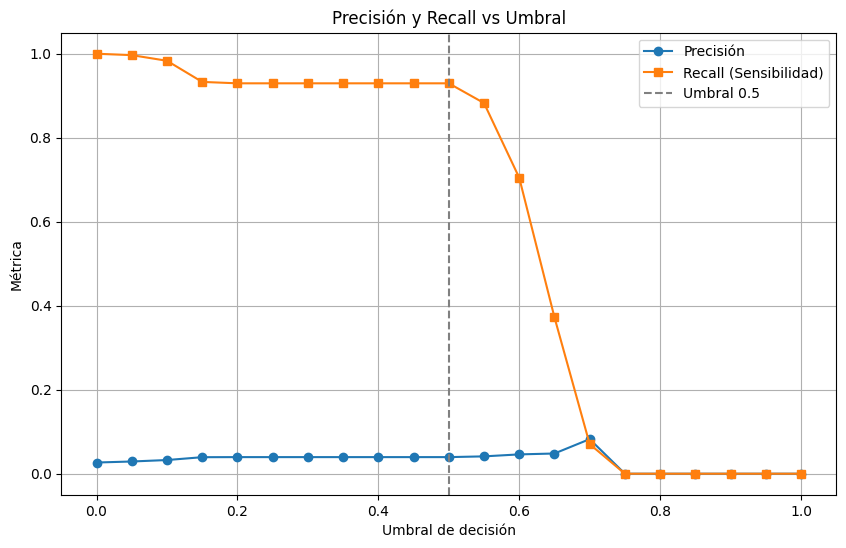

In [56]:

umbrales = np.arange(0.0, 1.01, 0.05)
precisiones = []
recalls = []

y_true = df_nuevo['FALLECIDO']
y_scores = df_nuevo['prob_fallecido']

for umbral in umbrales:
    y_pred = (y_scores >= umbral).astype(int)
    precisiones.append(precision_score(y_true, y_pred, zero_division=0))
    recalls.append(recall_score(y_true, y_pred))

# Gráfico
plt.figure(figsize=(10,6))
plt.plot(umbrales, precisiones, label='Precisión', marker='o')
plt.plot(umbrales, recalls, label='Recall (Sensibilidad)', marker='s')
plt.axvline(x=0.5, color='gray', linestyle='--', label='Umbral 0.5')
plt.title('Precisión y Recall vs Umbral')
plt.xlabel('Umbral de decisión')
plt.ylabel('Métrica')
plt.legend()
plt.grid(True)
plt.show()


probar random forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
def Random_forest_clas(df,target):
    # Initialize the model with class_weight='balanced'
    X = df.drop("target", axis = 1)
    y = df["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict
    y_pred_rf = rf_model.predict(X_test)

    # Evaluate
    print("Accuracy:", accuracy_score(y_test, y_pred_rf))
    print("Classification Report:\n", classification_report(y_test, y_pred_rf))

In [58]:
Random_forest_clas(df_cluster2,target='target')

Accuracy: 0.8316094331816302
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1490
         1.0       0.76      0.82      0.79       927

    accuracy                           0.83      2417
   macro avg       0.82      0.83      0.82      2417
weighted avg       0.84      0.83      0.83      2417



In [59]:
from sklearn.ensemble import RandomForestClassifier

# Preparar datos
X = df_cluster2.drop(columns=['target'])
y = df_cluster2['target']

# Separar train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo y guardarlo
modelo_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
modelo_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [60]:
df_nuevo = grd_dummies[
    (grd_dummies['EDAD'] >= 40) & (grd_dummies['EDAD'] <= 60) &
    (grd_dummies['DIAS_ESTANCIA'] >= 5) & (grd_dummies['DIAS_ESTANCIA'] <= 15) &
    (grd_dummies['SEXO_MUJER'] == 1) &
    (grd_dummies['AH_PH'] == 1)
].copy()


In [61]:
columnas_modelo_forest = X_train.columns  # Usa las mismas columnas que usaste para entrenar el modelo
X_nuevo_forest = df_nuevo[columnas_modelo_forest]

In [62]:
# Predicción (clase y probabilidad)
df_nuevo['pred_forest'] = modelo_forest.predict(X_nuevo_forest)
df_nuevo['prob_forest'] = modelo_forest.predict_proba(X_nuevo_forest)[:, 1]


In [63]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(df_nuevo['FALLECIDO'], df_nuevo['pred_forest']))
print("AUC ROC:", roc_auc_score(df_nuevo['FALLECIDO'], df_nuevo['prob_forest']))


              precision    recall  f1-score   support

           0       0.99      0.56      0.71     10877
           1       0.05      0.85      0.09       298

    accuracy                           0.57     11175
   macro avg       0.52      0.70      0.40     11175
weighted avg       0.97      0.57      0.70     11175

AUC ROC: 0.7536884368407445


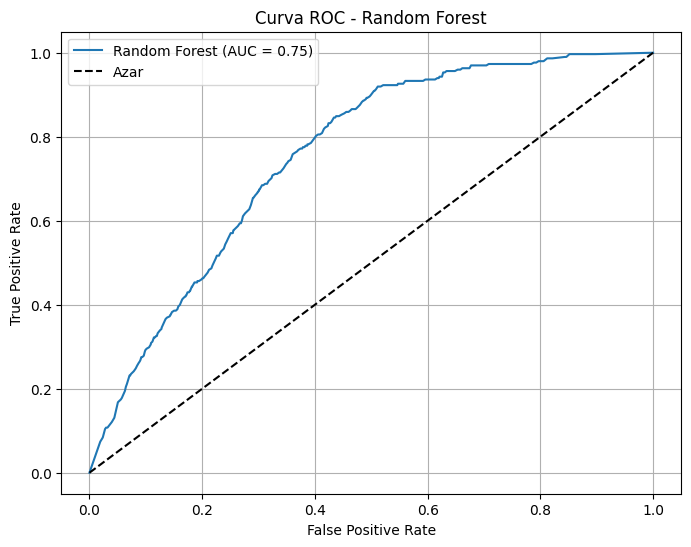

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Curva ROC
fpr, tpr, _ = roc_curve(df_nuevo['FALLECIDO'], df_nuevo['prob_forest'])
auc_score = roc_auc_score(df_nuevo['FALLECIDO'], df_nuevo['prob_forest'])

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], 'k--', label="Azar")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.grid(True)

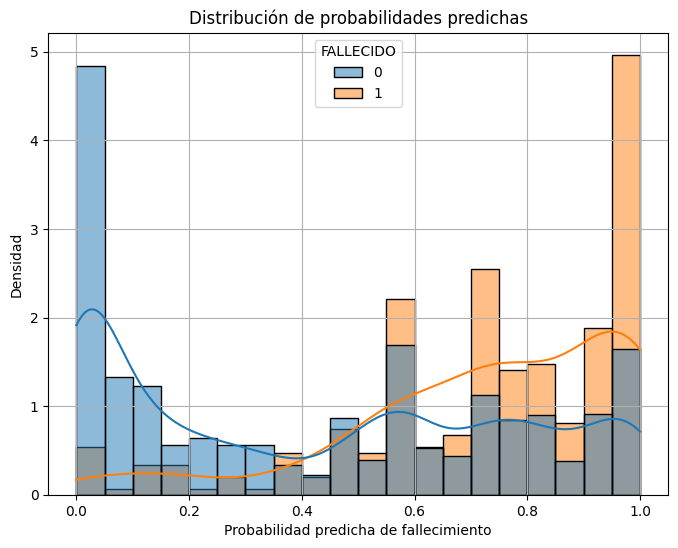

In [65]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(data=df_nuevo, x='prob_forest', hue='FALLECIDO', bins=20, kde=True, stat="density", common_norm=False)
plt.title("Distribución de probabilidades predichas")
plt.xlabel("Probabilidad predicha de fallecimiento")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()
